# Introduction
This dataset contains 9,537 records related to cybersecurity events, monitoring various network and user behavior attributes. It can be used to analyze and predict potential cyberattacks based on session-based activities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv(r"C:\datascience\dataset1/cybersecurity.csv")
print(df.to_string())

     session_id  network_packet_size protocol_type  login_attempts  session_duration encryption_used  ip_reputation_score  failed_logins browser_type  unusual_time_access  attack_detected
0     SID_00001                  599           TCP               4        492.983263             DES             0.606818              1         Edge                    0                1
1     SID_00002                  472           TCP               3       1557.996461             DES             0.301569              0      Firefox                    0                0
2     SID_00003                  629           TCP               3         75.044262             DES             0.739164              2       Chrome                    0                1
3     SID_00004                  804           UDP               4        601.248835             DES             0.123267              0      Unknown                    0                1
4     SID_00005                  453           TCP          

In [3]:
le=LabelEncoder()
column_to_convert=['session_id','protocol_type','encryption_used','browser_type']
for col in column_to_convert:
    df[col]=le.fit_transform(df[col])
df.head(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,4,453,1,5,532.540888,0,0.054874,1,2,0,0
5,5,453,2,5,380.471550,0,0.422486,2,0,1,0
6,6,815,0,4,728.107165,0,0.413772,1,0,0,1
7,7,653,1,3,12.599906,1,0.097719,3,0,1,1
8,8,406,1,2,542.558895,2,0.294580,0,0,1,0
9,9,608,2,6,531.944107,2,0.424117,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   int32  
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   int32  
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   int32  
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   int32  
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int32(4), int64(5)
memory usage: 670.7 KB


In [5]:
df.isna().sum()

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix.to_string())

                     session_id  network_packet_size  protocol_type  login_attempts  session_duration  encryption_used  ip_reputation_score  failed_logins  browser_type  unusual_time_access  attack_detected
session_id             1.000000            -0.008159       0.017866        0.005743          0.000732        -0.007151             0.004571       0.001469     -0.011266            -0.001116        -0.002473
network_packet_size   -0.008159             1.000000       0.011951       -0.001890          0.021650         0.014729             0.002320      -0.011676      0.019276            -0.001255        -0.006798
protocol_type          0.017866             0.011951       1.000000        0.023631         -0.003635        -0.018231             0.030647      -0.005951      0.016380             0.002427         0.013890
login_attempts         0.005743            -0.001890       0.023631        1.000000          0.006392         0.001626            -0.002618      -0.013507     -0.004986    

In [8]:
x=df.iloc[:,0:9]
x=pd.DataFrame(x)
y=df.iloc[:,10]
y=pd.DataFrame(y)
print(y)

      attack_detected
0                   1
1                   0
2                   1
3                   1
4                   0
...               ...
9532                1
9533                0
9534                0
9535                0
9536                1

[9537 rows x 1 columns]


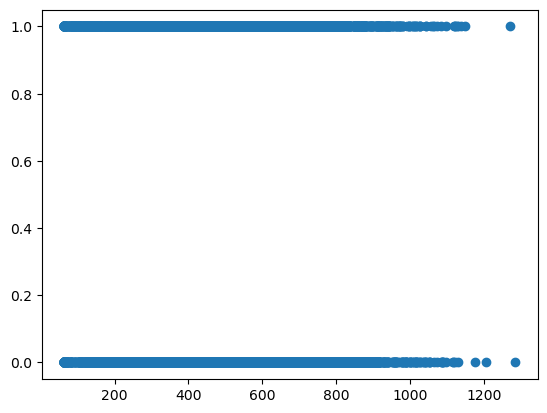

In [9]:
plt.scatter(df['network_packet_size'],df['attack_detected'])
plt.show()

In [10]:
x=df.iloc[:,2:9].values
x=pd.DataFrame(x)
y=df['attack_detected']
y=pd.DataFrame(y)

In [11]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=.2,random_state=42)

In [12]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

# Model of SVM

In [13]:
classifier=SVC(kernel='linear',random_state=42)
classifier.fit(x_train,y_train)

c:\Users\jishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [14]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
      attack_detected
1323                1
2742                1
3582                0
5688                0
1614                0
...               ...
5734                1
5191                0
5390                0
860                 0
7270                0

[7629 rows x 1 columns]


In [15]:
print("mse value of svm:",metrics.mean_absolute_error(y_pred,y_test))
print("accuracy in svm:",metrics.accuracy_score(y_pred,y_test))

mse value of svm: 0.26844933805216936
accuracy in svm: 0.7315506619478307


# Model Of KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
model1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model1.fit(x_train,y_train)

c:\Users\jishn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
y_pred=model1.predict(x_test)
print(y_test)
print(y_pred)

      attack_detected
1323                1
2742                1
3582                0
5688                0
1614                0
...               ...
5734                1
5191                0
5390                0
860                 0
7270                0

[7629 rows x 1 columns]
[1 0 0 ... 0 0 0]


In [18]:
print("mse value of KNN:",metrics.mean_absolute_error(y_pred,y_test))
print("accuracy in KNN:",metrics.accuracy_score(y_pred,y_test))

mse value of KNN: 0.20356534277100538
accuracy in KNN: 0.7964346572289946


# Mode Of Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(x_train,y_train)

c:\Users\jishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
y_pred=model2.predict(x_test)
print(y_test)
print(y_pred)

      attack_detected
1323                1
2742                1
3582                0
5688                0
1614                0
...               ...
5734                1
5191                0
5390                0
860                 0
7270                0

[7629 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [21]:
print("mse value of Logistic regression:",metrics.mean_absolute_error(y_pred,y_test))
print("accuracy in Logistic regression:",metrics.accuracy_score(y_pred,y_test))

mse value of Logistic regression: 0.2725127801808887
accuracy in Logistic regression: 0.7274872198191112


# Model Of Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=10,criterion='entropy')
model3.fit(x_train,y_train)

C:\Users\jishn\AppData\Local\Temp\ipykernel_9796\3263479636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [23]:
y_pred=model3.predict(x_test)
print(y_test)
print(y_pred)

      attack_detected
1323                1
2742                1
3582                0
5688                0
1614                0
...               ...
5734                1
5191                0
5390                0
860                 0
7270                0

[7629 rows x 1 columns]
[1 0 0 ... 0 0 0]


In [24]:
print("mse value of Random forest:",metrics.mean_absolute_error(y_pred,y_test))
print("accuracy in Random forest:",metrics.accuracy_score(y_pred,y_test))

mse value of Random forest: 0.12871936033556167
accuracy in Random forest: 0.8712806396644384


# Model Of Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy',random_state=67)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=67)

In [26]:
y_pred=model4.predict(x_test)
print(y_test)
print(y_pred)

      attack_detected
1323                1
2742                1
3582                0
5688                0
1614                0
...               ...
5734                1
5191                0
5390                0
860                 0
7270                0

[7629 rows x 1 columns]
[1 0 0 ... 1 0 0]


In [27]:
print("mse value of decision tree:",metrics.mean_absolute_error(y_pred,y_test))
print("accuracy in decision tree:",metrics.accuracy_score(y_pred,y_test)*100)

mse value of decision tree: 0.19819111285882815
accuracy in decision tree: 80.18088871411719


# Summary
It is designed to detect and analyze cybersecurity threats by identifying patterns in network sessions that indicate wheather an attack has occurred.The RANDOM FOREST model achived  the highest accuracy of 87%,making it the best performing model